In [1]:
#Objective: To predict Car Price based on different features.

In [2]:
import pandas as pd

C:\Users\Manish\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df=pd.read_csv("C:\\Users\\Manish\\Downloads\\autos_dataset.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
import numpy as np
df.replace('?',np.nan,inplace=True)

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [8]:
df["engine-type"].value_counts()

engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [9]:
# Check average price by number of doors
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.groupby('num-of-doors')['price'].agg(['mean', 'median', 'count'])


,mean,median,count
num-of-doors,,,
four,13565.672566,11245.0,113
two,12818.127907,9927.0,86


In [10]:
n=df.describe().columns
n

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

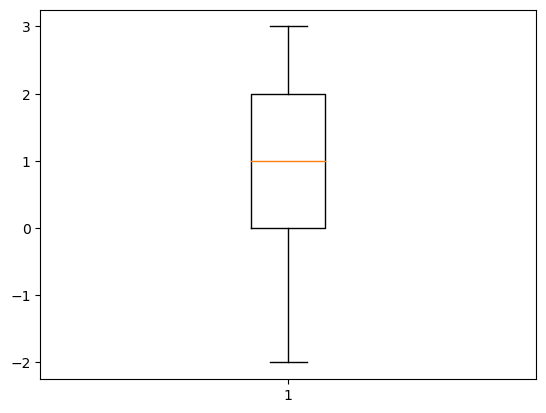

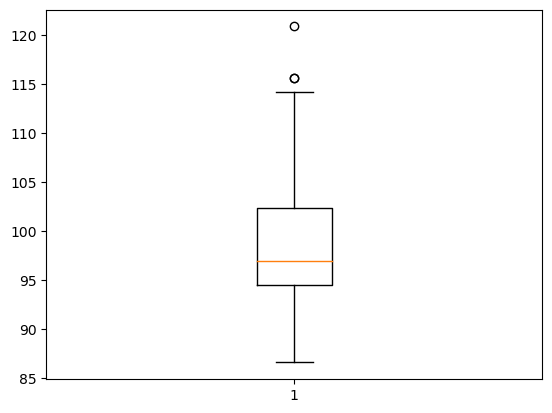

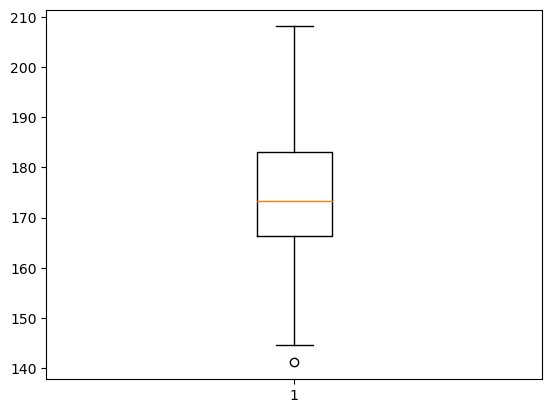

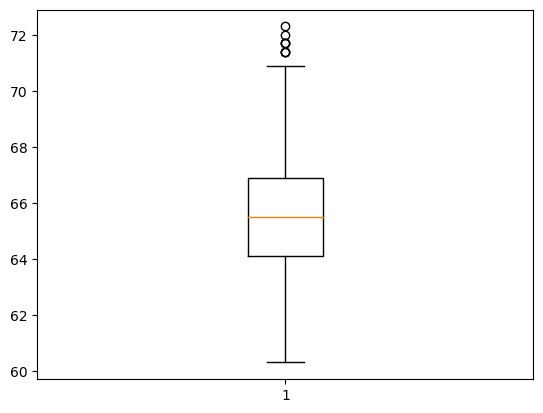

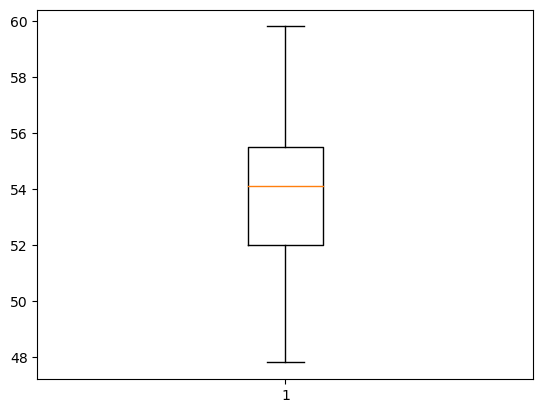

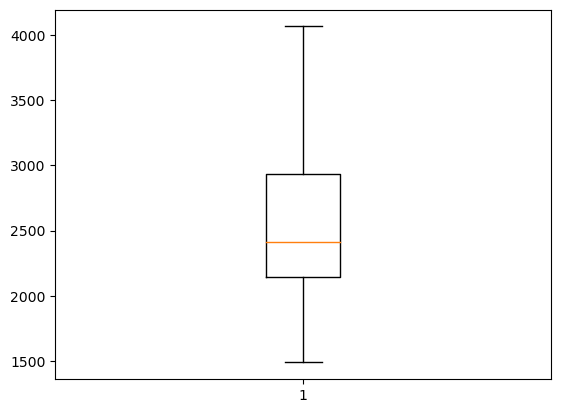

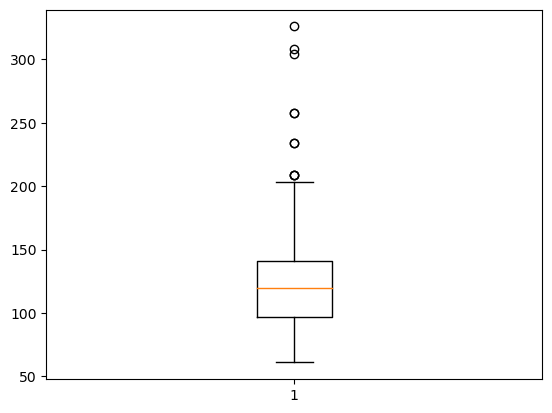

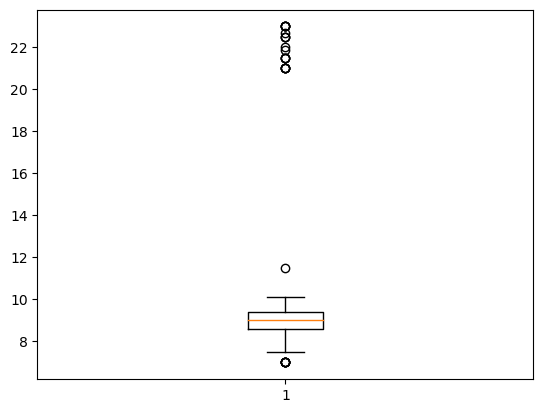

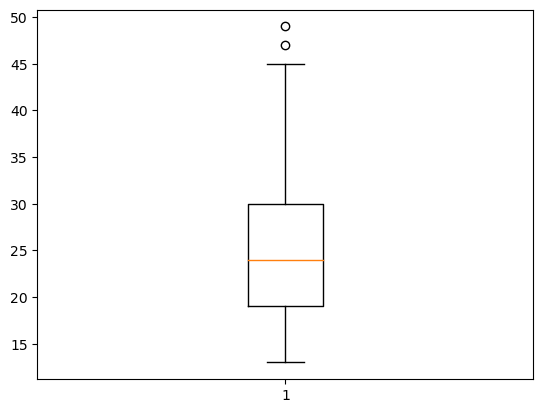

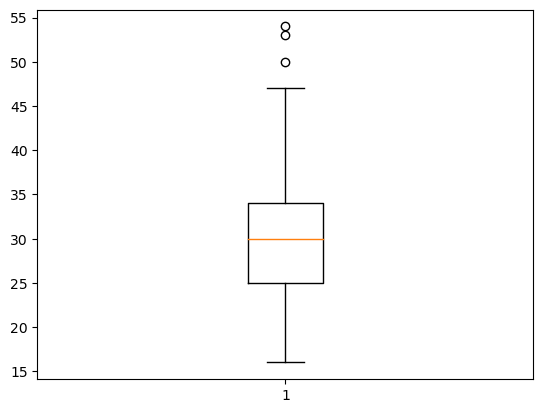

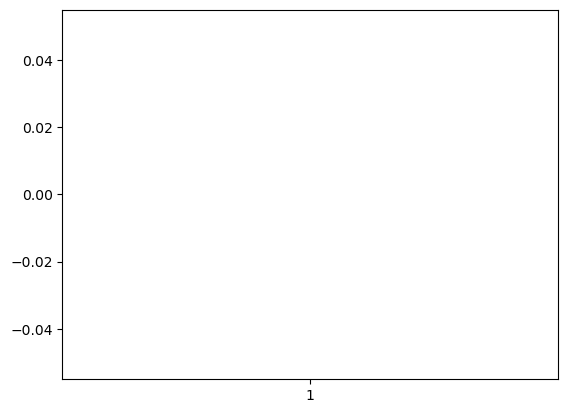

In [11]:
import matplotlib.pyplot as plt
for i in n:
      plt.boxplot(df[i])
      plt.show()  

In [12]:
# Group by make-i.e car_type )
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')

make_median = df.groupby('make')['normalized-losses'].median()

df['normalized-losses'] = df['normalized-losses'].fillna(df['make'].map(make_median))
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].median())


In [13]:
df['normalized-losses'].isnull().sum()

0

In [14]:
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')

make_bore_median = df.groupby('make')['bore'].median()
df['bore'] = df['bore'].fillna(df['make'].map(make_bore_median))
df['bore'].isnull().sum()

0

In [15]:
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')

make_stroke_median = df.groupby('make')['stroke'].median()
df['stroke'] = df['stroke'].fillna(df['make'].map(make_stroke_median))
df['stroke'].isnull().sum()

0

In [16]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

make_horsepower_median = df.groupby('make')['horsepower'].median()
df['horsepower'] = df['stroke'].fillna(df['make'].map(make_horsepower_median))
df['horsepower'].isnull().sum()

0

In [17]:
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

median = df['peak-rpm'].median()
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median())
df['peak-rpm'].isnull().sum()

0

In [18]:
df['num-of-doors'] = df['num-of-doors'].fillna("four")
df['num-of-doors'].isnull().sum()

0

In [19]:
df['num-of-doors'].value_counts()

num-of-doors
four    116
two      89
Name: count, dtype: int64

In [20]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [21]:
df = df.dropna(subset=['price'])
df['price'].isna().sum()

0

In [22]:
#Outlier Handling

C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


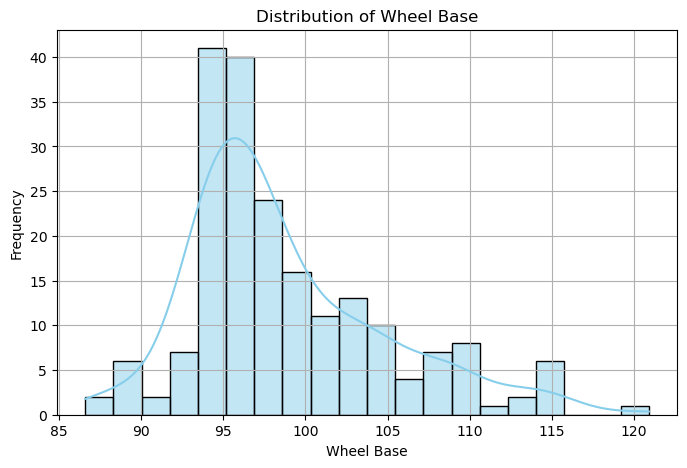

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['wheel-base'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Wheel Base')
plt.xlabel('Wheel Base')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [24]:
# Calculate IQR
Q1 = df['wheel-base'].quantile(0.25)
Q3 = df['wheel-base'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds with a 1.5 IQR multiplier (adjust if needed)
lower_bound = Q1 - 2* IQR
upper_bound = Q3 + 2* IQR

# Calculate median of 'days_employed'
median = df['wheel-base'].median()

# Replace outliers with the median
df['wheel-base'] = df['wheel-base'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

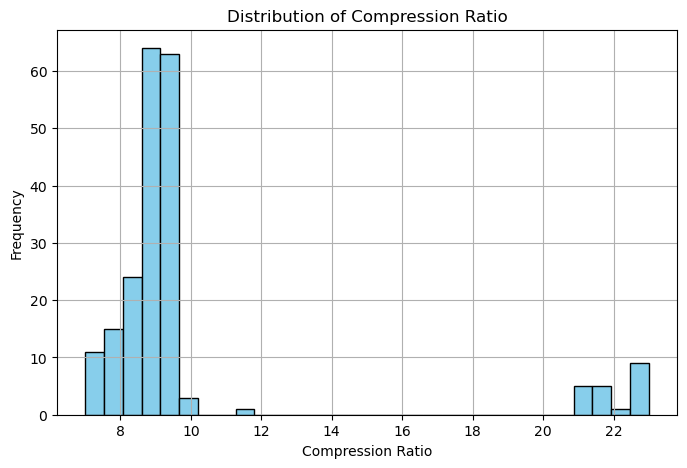

In [25]:
#compression-ratio- it has more outlier
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['compression-ratio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Compression Ratio')
plt.xlabel('Compression Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [26]:
df['compression-ratio'].skew()   ##Right Skewed


2.5844624326120726

In [27]:
#log transformation
import numpy as np
df['compression-ratio'] = np.log1p(df['compression-ratio']) 


In [28]:
# Use the transformed colum
Q1 = df['compression-ratio'].quantile(0.25)
Q3 = df['compression-ratio'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
df['compression-ratio'] = df['compression-ratio'].clip(lower=lower_bound, upper=upper_bound)


Lower bound: 2.1817203908002543, Upper bound: 2.4218485138208634


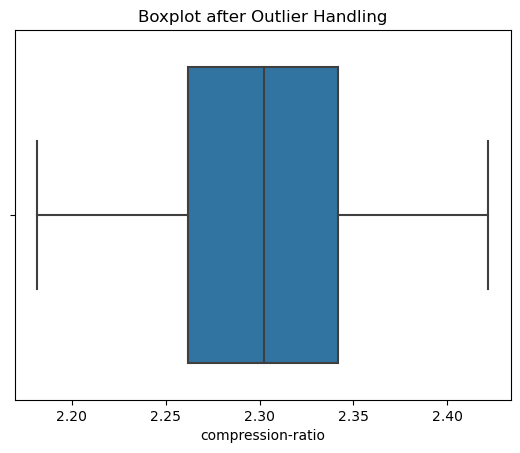

In [29]:
sns.boxplot(x=df['compression-ratio'])
plt.title('Boxplot after Outlier Handling')
plt.show()


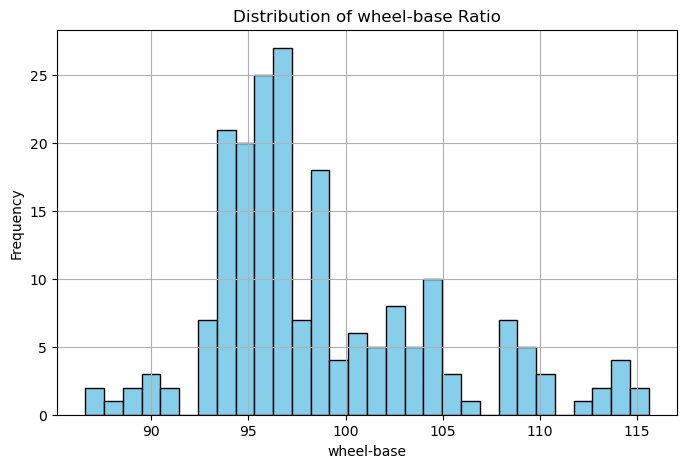

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['wheel-base'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of wheel-base Ratio')
plt.xlabel('wheel-base')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [31]:
Q1 = df['wheel-base'].quantile(0.25)
Q3 = df['wheel-base'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['wheel-base'] = df['wheel-base'].clip(lower=lower_bound, upper=upper_bound)

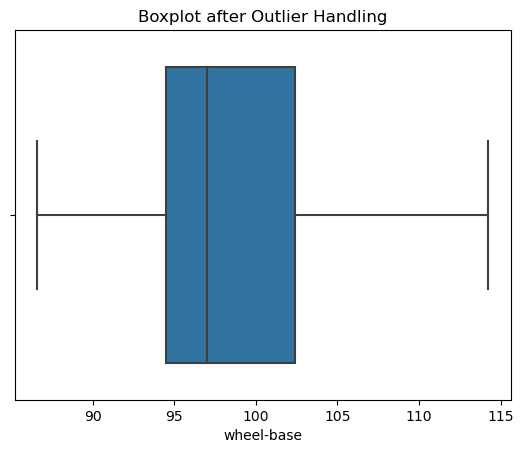

In [32]:
sns.boxplot(x=df['wheel-base'])
plt.title('Boxplot after Outlier Handling')
plt.show()


In [33]:
Q1 = df['length'].quantile(0.25)
Q3 = df['length'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['length'] = df['length'].clip(lower=lower_bound, upper=upper_bound)

In [34]:
Q1 = df['width'].quantile(0.25)
Q3 = df['width'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['width'] = df['width'].clip(lower=lower_bound, upper=upper_bound)

In [35]:
Q1 = df['engine-size'].quantile(0.25)
Q3 = df['engine-size'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['engine-size'] = df['engine-size'].clip(lower=lower_bound, upper=upper_bound)

In [36]:
Q1 = df['city-mpg'].quantile(0.25)
Q3 = df['city-mpg'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['city-mpg'] = df['city-mpg'].clip(lower=lower_bound, upper=upper_bound)

In [37]:
Q1 = df['highway-mpg'].quantile(0.25)
Q3 = df['highway-mpg'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['highway-mpg'] = df['highway-mpg'].clip(lower=lower_bound, upper=upper_bound)

In [38]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

X=df.drop('price',axis=1)
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,119.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130.0,mpfi,3.47,2.68,2.302585,2.68,5000.0,21.0,27.0
1,3,119.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130.0,mpfi,3.47,2.68,2.302585,2.68,5000.0,21.0,27.0
2,1,119.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152.0,mpfi,2.68,3.47,2.302585,3.47,5000.0,19.0,26.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109.0,mpfi,3.19,3.40,2.397895,3.40,5500.0,24.0,30.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136.0,mpfi,3.19,3.40,2.197225,3.40,5500.0,18.0,22.0


In [39]:
X=pd.get_dummies(X).astype(int)
X

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,119,88,168,64,48,2548,130,3,2,...,0,0,0,0,0,0,0,1,0,0
1,3,119,88,168,64,48,2548,130,3,2,...,0,0,0,0,0,0,0,1,0,0
2,1,119,94,171,65,52,2823,152,2,3,...,0,0,0,0,0,0,0,1,0,0
3,2,164,99,176,66,54,2337,109,3,3,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99,176,66,54,2824,136,3,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109,188,68,55,2952,141,3,3,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,109,188,68,55,3049,141,3,3,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,109,188,68,55,3012,173,3,2,...,0,0,0,0,0,0,0,1,0,0
203,-1,95,109,188,68,55,3217,145,3,3,...,0,0,0,0,0,1,0,0,0,0


In [40]:
X.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.474945,-0.542176,-0.363269,-0.240318,-0.535668,-0.233118,-0.106108,-0.120639,-0.075441,...,-0.047499,0.245809,-0.039299,-0.032515,0.212339,-0.196735,0.121979,0.013138,0.181292,0.065487
normalized-losses,0.474945,1.000000,-0.010385,0.089355,0.126541,-0.345632,0.186882,0.265801,-0.067847,0.015858,...,0.039989,0.100631,-0.139650,-0.191296,0.086928,-0.101483,0.039989,0.231844,0.112287,-0.011739
wheel-base,-0.542176,-0.010385,1.000000,0.854969,0.781080,0.578085,0.758523,0.534451,0.332408,0.150095,...,0.045581,-0.077973,-0.198701,-0.395825,-0.067356,0.318981,-0.038693,0.345686,-0.122569,-0.026654
length,-0.363269,0.089355,0.854969,1.000000,0.853638,0.488350,0.880363,0.705182,0.474355,0.067419,...,0.100183,-0.055017,-0.302633,-0.476566,-0.047526,0.209445,-0.004123,0.504556,-0.079651,-0.009917
width,-0.240318,0.126541,0.781080,0.853638,1.000000,0.290810,0.869397,0.728556,0.351723,0.078602,...,0.163281,-0.025392,-0.184337,-0.536184,-0.021935,0.254956,0.022576,0.452285,-0.038581,-0.012600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.196735,-0.101483,0.318981,0.209445,0.254956,0.262722,0.221046,0.112684,0.067278,0.106198,...,-0.023505,-0.047367,-0.079983,-0.227198,-0.040917,1.000000,-0.023505,-0.305391,-0.071969,-0.023505
fuel-system_mfi,0.121979,0.039989,-0.038693,-0.004123,0.022576,-0.094080,0.034989,0.067005,0.025418,0.022591,...,-0.005000,-0.010076,-0.017014,-0.048330,-0.008704,-0.023505,1.000000,-0.064963,-0.015309,-0.005000
fuel-system_mpfi,0.013138,0.231844,0.345686,0.504556,0.452285,0.125036,0.508654,0.510109,0.267504,-0.114562,...,0.076967,-0.059408,-0.221055,-0.627929,-0.113086,-0.305391,-0.064963,1.000000,-0.198908,-0.064963
fuel-system_spdi,0.181292,0.112287,-0.122569,-0.079651,-0.038581,-0.278341,-0.002517,0.021970,0.077826,0.069169,...,-0.015309,-0.030851,-0.052094,-0.147979,-0.026650,-0.071969,-0.015309,-0.198908,1.000000,-0.015309


In [41]:
dff=pd.get_dummies(df).astype(int)
dff

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,119,88,168,64,48,2548,130,3,2,...,0,0,0,0,0,0,0,1,0,0
1,3,119,88,168,64,48,2548,130,3,2,...,0,0,0,0,0,0,0,1,0,0
2,1,119,94,171,65,52,2823,152,2,3,...,0,0,0,0,0,0,0,1,0,0
3,2,164,99,176,66,54,2337,109,3,3,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99,176,66,54,2824,136,3,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109,188,68,55,2952,141,3,3,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,109,188,68,55,3049,141,3,3,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,109,188,68,55,3012,173,3,2,...,0,0,0,0,0,0,0,1,0,0
203,-1,95,109,188,68,55,3217,145,3,3,...,0,0,0,0,0,1,0,0,0,0


In [42]:
dff.drop(["price"],axis=1,inplace=True)
dff

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,119,88,168,64,48,2548,130,3,2,...,0,0,0,0,0,0,0,1,0,0
1,3,119,88,168,64,48,2548,130,3,2,...,0,0,0,0,0,0,0,1,0,0
2,1,119,94,171,65,52,2823,152,2,3,...,0,0,0,0,0,0,0,1,0,0
3,2,164,99,176,66,54,2337,109,3,3,...,0,0,0,0,0,0,0,1,0,0
4,2,164,99,176,66,54,2824,136,3,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109,188,68,55,2952,141,3,3,...,0,0,0,0,0,0,0,1,0,0
201,-1,95,109,188,68,55,3049,141,3,3,...,0,0,0,0,0,0,0,1,0,0
202,-1,95,109,188,68,55,3012,173,3,2,...,0,0,0,0,0,0,0,1,0,0
203,-1,95,109,188,68,55,3217,145,3,3,...,0,0,0,0,0,1,0,0,0,0


In [48]:
y=df["price"]

In [ ]:
dff.corr().tail(1).to_dict()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dff.corr().tail(1))
plt.show()

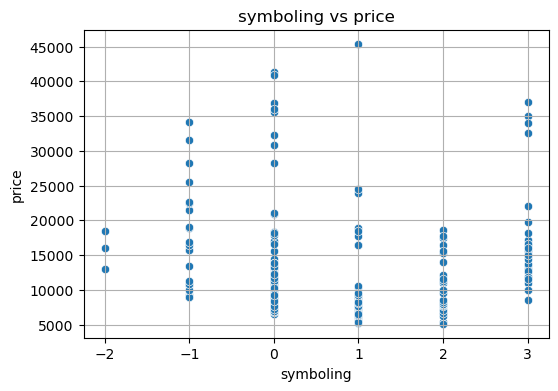

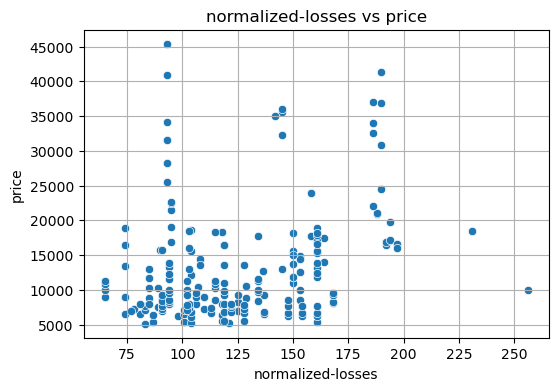

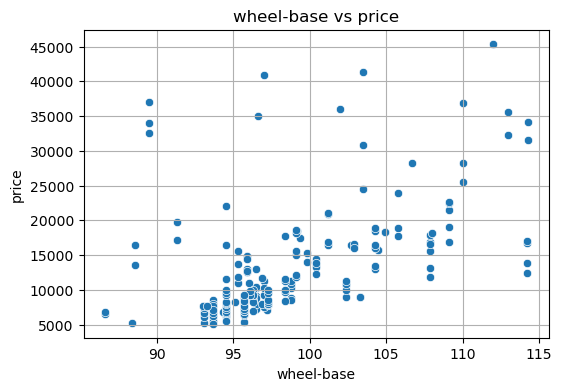

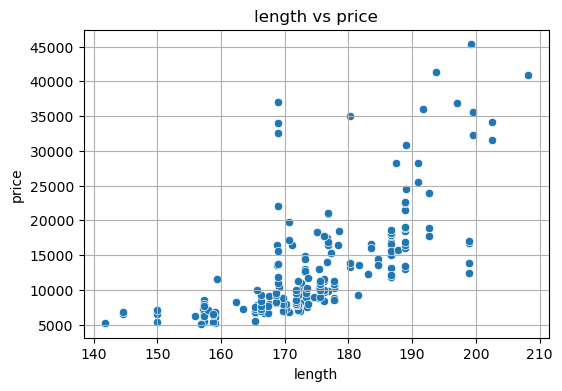

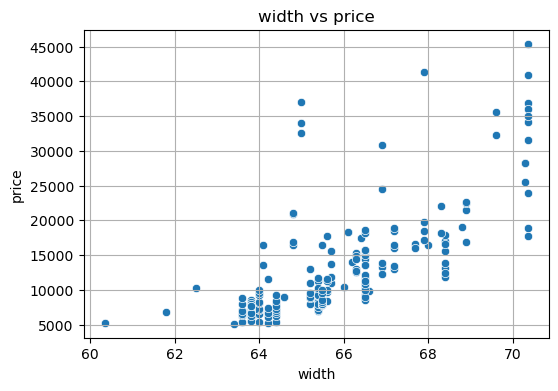

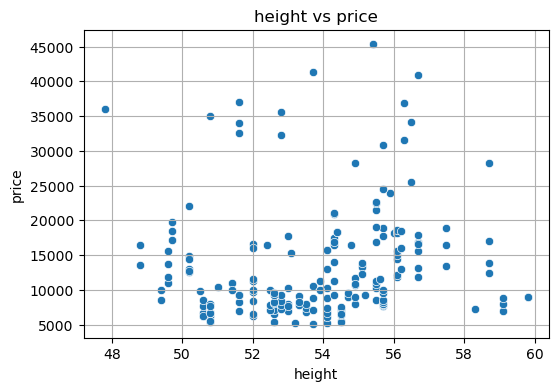

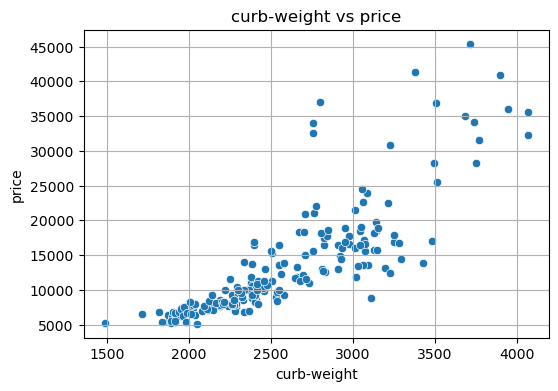

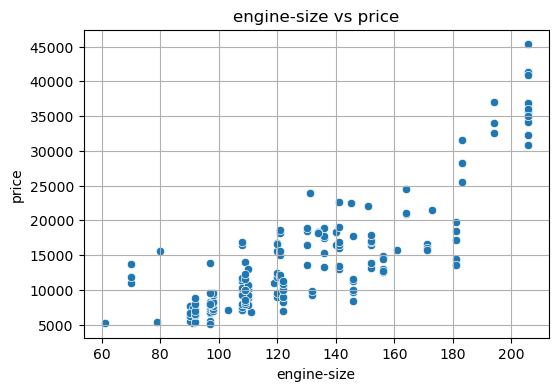

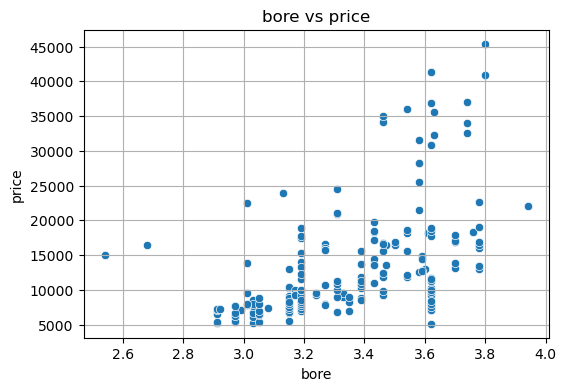

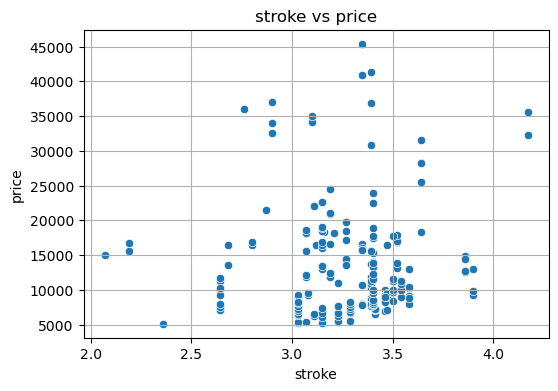

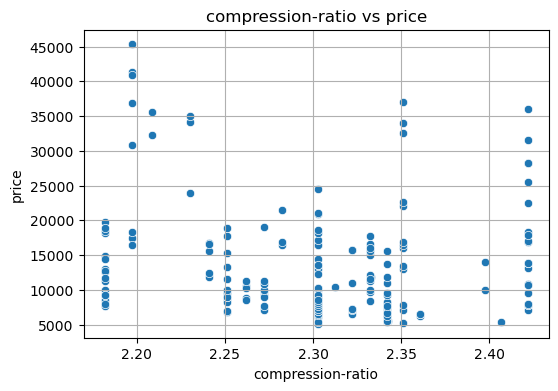

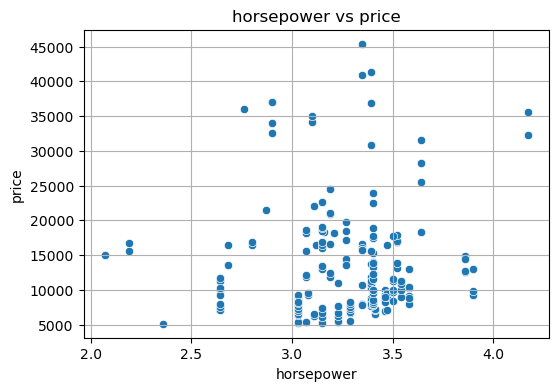

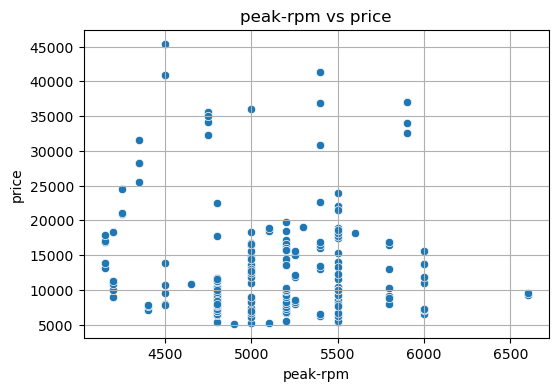

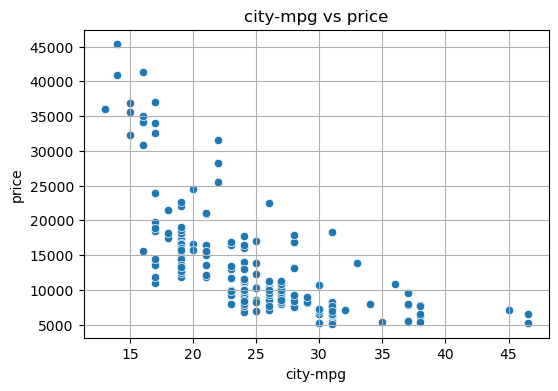

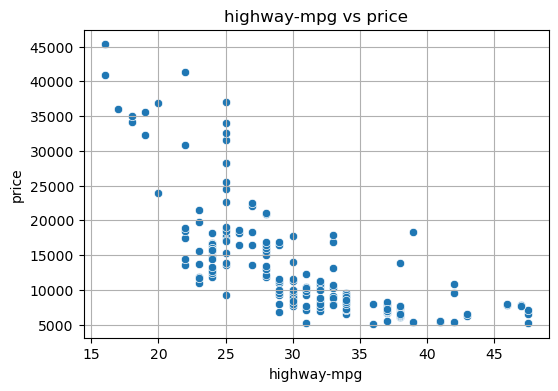

In [52]:
#linearity Assumption
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.select_dtypes(include=[float, int]).columns:
    if col != 'price':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['price'])
        plt.title(f'{col} vs price')
        plt.xlabel(col)
        plt.ylabel('price')
        plt.grid(True)
        plt.show()


In [50]:
y=df['price']

In [51]:
X.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.474945,-0.542176,-0.363269,-0.240318,-0.535668,-0.233118,-0.106108,-0.120639,-0.075441,...,-0.047499,0.245809,-0.039299,-0.032515,0.212339,-0.196735,0.121979,0.013138,0.181292,0.065487
normalized-losses,0.474945,1.000000,-0.010385,0.089355,0.126541,-0.345632,0.186882,0.265801,-0.067847,0.015858,...,0.039989,0.100631,-0.139650,-0.191296,0.086928,-0.101483,0.039989,0.231844,0.112287,-0.011739
wheel-base,-0.542176,-0.010385,1.000000,0.854969,0.781080,0.578085,0.758523,0.534451,0.332408,0.150095,...,0.045581,-0.077973,-0.198701,-0.395825,-0.067356,0.318981,-0.038693,0.345686,-0.122569,-0.026654
length,-0.363269,0.089355,0.854969,1.000000,0.853638,0.488350,0.880363,0.705182,0.474355,0.067419,...,0.100183,-0.055017,-0.302633,-0.476566,-0.047526,0.209445,-0.004123,0.504556,-0.079651,-0.009917
width,-0.240318,0.126541,0.781080,0.853638,1.000000,0.290810,0.869397,0.728556,0.351723,0.078602,...,0.163281,-0.025392,-0.184337,-0.536184,-0.021935,0.254956,0.022576,0.452285,-0.038581,-0.012600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.196735,-0.101483,0.318981,0.209445,0.254956,0.262722,0.221046,0.112684,0.067278,0.106198,...,-0.023505,-0.047367,-0.079983,-0.227198,-0.040917,1.000000,-0.023505,-0.305391,-0.071969,-0.023505
fuel-system_mfi,0.121979,0.039989,-0.038693,-0.004123,0.022576,-0.094080,0.034989,0.067005,0.025418,0.022591,...,-0.005000,-0.010076,-0.017014,-0.048330,-0.008704,-0.023505,1.000000,-0.064963,-0.015309,-0.005000
fuel-system_mpfi,0.013138,0.231844,0.345686,0.504556,0.452285,0.125036,0.508654,0.510109,0.267504,-0.114562,...,0.076967,-0.059408,-0.221055,-0.627929,-0.113086,-0.305391,-0.064963,1.000000,-0.198908,-0.064963
fuel-system_spdi,0.181292,0.112287,-0.122569,-0.079651,-0.038581,-0.278341,-0.002517,0.021970,0.077826,0.069169,...,-0.015309,-0.030851,-0.052094,-0.147979,-0.026650,-0.071969,-0.015309,-0.198908,1.000000,-0.015309


In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 3433922.91
Root Mean Squared Error (RMSE): 1853.08
Mean Absolute Error (MAE): 1418.17
R² Score: 0.95


In [57]:
# training 
y_pred_train = lr_model.predict(X_train)
r2_train= r2_score(y_train, y_pred_train)
r2_train

0.9529192593686412

C:\Users\Manish\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


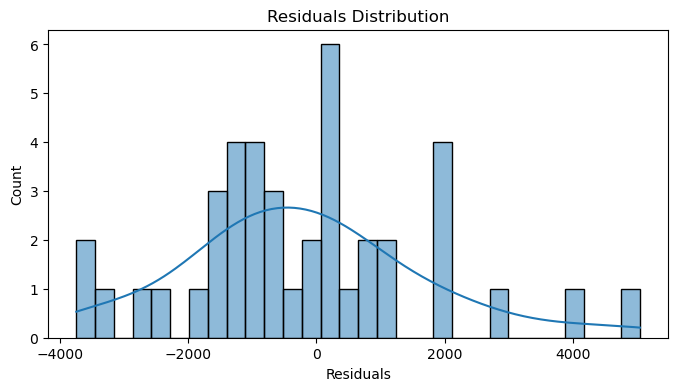

In [58]:
# Residuals
import matplotlib.pyplot as plt
import seaborn as sns
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()


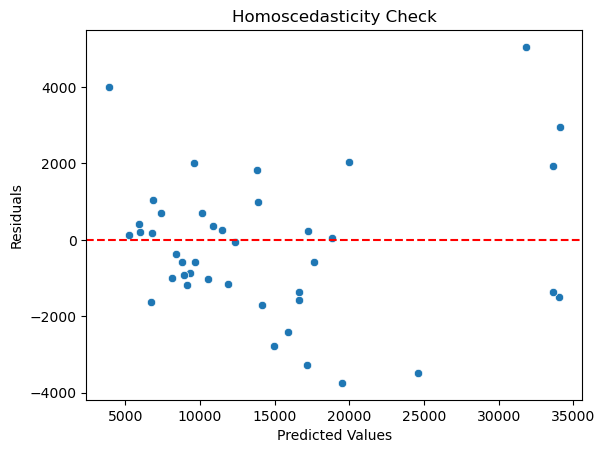

In [59]:
# Homoscedasticity
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.show()


In [60]:
# Get the coefficients and intercept
coefficients = lr_model.coef_
intercept = lr_model.intercept_
coefficients

array([-6.20315622e+02, -4.05950878e+02,  7.75398434e+02, -5.08820727e+02,
       -2.98598823e+02, -1.14905100e+03,  4.77137848e+03,  6.09885928e+02,
       -4.62297104e+02, -1.55914717e+02,  1.93267624e-12, -1.55914717e+02,
        5.28145704e+02, -6.29707403e+02,  6.78045003e+02,  1.80340832e+02,
        7.99842861e+02,  1.42840753e+03, -1.56013125e+02, -6.57392096e+02,
        2.84770747e+01, -4.91117613e+02,  3.17826631e+02,  2.37954584e+02,
        9.94862188e+02, -1.16931390e+02, -7.31232023e+02,  8.53477748e+00,
       -1.63172256e+02, -6.88122687e+02,  4.03490372e+02, -2.01424738e+02,
        5.93301174e+02, -1.35662339e+02, -5.70861002e+02,  2.37196641e+02,
       -2.07765902e+02, -4.27160074e+01,  4.27160074e+01, -4.59137598e+02,
        4.59137598e+02, -1.18665173e+02,  1.18665173e+02,  4.58057466e+01,
        1.31459655e+02, -5.84839729e+01,  7.63931151e+01, -1.43737183e+02,
       -2.53281550e+02, -1.17660102e+02,  2.09609114e+02, -4.03490372e+02,
        4.03490372e+02,  

In [61]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')


C:\Users\Manish\AppData\Local\Temp\ipykernel_27572\3070116034.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')


In [62]:
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor( random_state = 0)
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 2548.4389291505017
R² Score: 0.9142864463588806


In [67]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 2955.932517748657
R² Score: 0.9285838373229623


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=0)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2)
print(" RMSE:", rmse)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R² Score: 0.9282582341919978
 RMSE: 2331.500489751303


In [68]:
import seaborn as sns
# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to visualize feature importance
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df
feature_importance
important_features = feature_importance_df['Feature'].tolist()
print(important_features)


['curb-weight', 'engine-size', 'highway-mpg', 'city-mpg', 'wheel-base', 'normalized-losses', 'width', 'peak-rpm', 'length', 'make_bmw', 'height', 'num-of-cylinders_four', 'symboling', 'make_mercedes-benz', 'body-style_sedan', 'engine-type_ohc', 'num-of-cylinders_eight', 'engine-type_ohcv', 'fuel-system_2bbl', 'fuel-system_mpfi', 'aspiration_turbo', 'drive-wheels_rwd', 'make_audi', 'make_volvo', 'aspiration_std', 'num-of-doors_two', 'body-style_hatchback', 'num-of-cylinders_six', 'make_toyota', 'stroke', 'body-style_convertible', 'body-style_wagon', 'fuel-type_diesel', 'drive-wheels_fwd', 'make_mazda', 'make_peugot', 'horsepower', 'engine-type_dohc', 'num-of-doors_four', 'num-of-cylinders_five', 'engine-location_front', 'engine-type_l', 'make_nissan', 'drive-wheels_4wd', 'body-style_hardtop', 'make_isuzu', 'num-of-cylinders_twelve', 'make_renault', 'fuel-type_gas', 'fuel-system_idi', 'make_plymouth', 'make_mercury', 'engine-type_rotor', 'make_mitsubishi', 'fuel-system_spdi', 'engine-typ

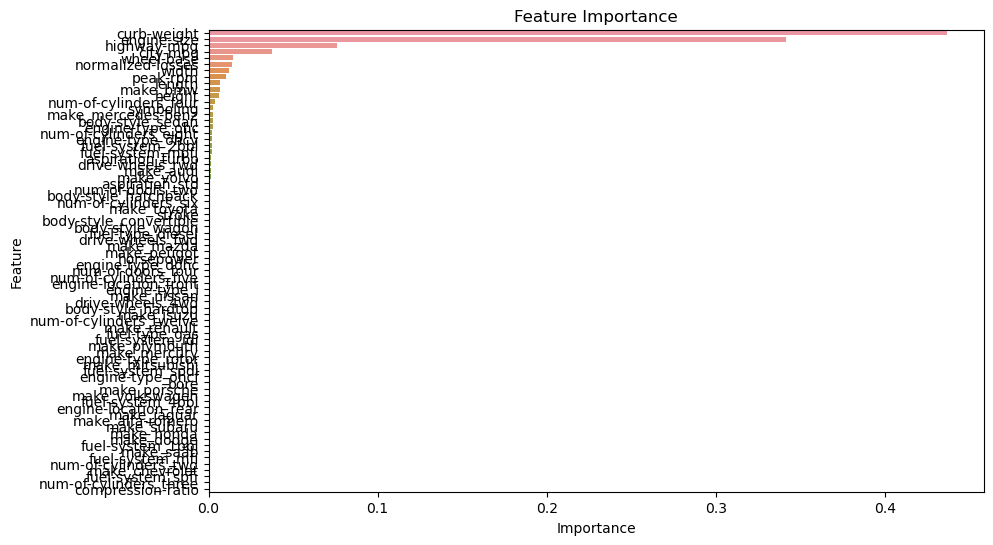

In [69]:
import matplotlib.pyplot as plt
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


In [70]:
# keep only features with importance > 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature']
X_reduced = X[important_features]
X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, random_state=0)
rf.fit(X_train_red, y_train)
y_pred = rf.predict(X_test_red)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 2833.942033295127
R² Score: 0.9095922115640402


In [ ]:
print(X.shape)  # should be (150, n_features)
print(y.shape)  # should be (150,) or (150, 1)


In [66]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(n_estimator=200,random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RMSE: 2769.81
R² Score: 0.94


C:\Users\Manish\AppData\Roaming\Python\Python311\site-packages\xgboost\training.py:183: UserWarning: [17:30:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimator" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Feature Scaling (Very important for ANN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 3. Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input + hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer

model.add(Dense(32, activation='relu'))  # Hidden layer

model.add(Dense(1))  # Output layer (no activation for regression)

# 4. Compile the model
model.compile(optimizer='adam', loss='mse')

# 5. Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# 6. Predictions and evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE (ANN):", rmse)
print("R² Score (ANN):", r2)





Epoch 1/100

16/16 [==============================] - 2s 3ms/step - loss: 225984768.0000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 225922096.0000
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 225653808.0000
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 224464208.0000
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 220423072.0000
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 207343872.0000
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 172764576.0000
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 102685312.0000
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 26138288.0000
Epoch 10/100
16/16 [==============================] - 0s 2ms/step - loss: 14181619.0000
Epoch 11/100
16/16 [==============================] - 0s 3ms/step - loss: 9857896.0000
Epoch 12/100
16/16 [==========

In [ ]:
#Feature Engineering

In [74]:
df['car_volume'] = df['length'] * df['width'] * df['height']


In [75]:
X=df.drop('price',axis=1)
X.head()
X=pd.get_dummies(X)

In [76]:
y=df['price']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [78]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
from sklearn.linear_model import LinearRegression
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 2. Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Train Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 4. Predict and get residuals
y_pred = lin_reg.predict(X_test)
residuals = y_test - y_pred
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 2889.434969063791
R² Score: 0.889813880405145


In [80]:
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor( random_state = 0)
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
y_pred
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 3188.6734913042355
R² Score: 0.8658096942117456


In [81]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 2135.9272234227883
R² Score: 0.9397892631549662


In [82]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestRegressor(random_state=0)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='r2', cv=5, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get best model
best_rf = grid_search.best_estimator_

# Predict
y_pred = best_rf.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2)
print(" RMSE:", rmse)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R² Score: 0.9369015512639951
 RMSE: 2186.54702134221


In [83]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Feature Scaling (Very important for ANN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 3. Build ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input + hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer

model.add(Dense(32, activation='relu'))  # Hidden layer

model.add(Dense(1))  # Output layer (no activation for regression)

# 4. Compile the model
model.compile(optimizer='adam', loss='mse')

# 5. Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# 6. Predictions and evaluation
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE (ANN):", rmse)
print("R² Score (ANN):", r2)


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 225982896.0000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 225900000.0000
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 225592544.0000
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 224411232.0000
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 219554048.0000
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 204187184.0000
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 160783040.0000
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 82364472.0000
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 18769966.0000
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 12692587.0000
Epoch 11/100
16/16 [==============================] - 0s 3ms/step - loss: 7993489.5000
Epoch 12/100
16/16 [===============